<h1>1:00:00/1:23:15</h1>

<h1>Workflow</h1>

<h2>
    0. Import important libraries<br>
    1. Get dataset ready (turn into tensor and batches)<br>
    2. Build a NeuralNetwork model for classification<br>
    3. Pick a loss function and optimizer<br>
    4. Build a training loop<br>
    5. Evaluate your model<br>
    6. Improve your model<br>
    7. Save the model
</h2>

<h2>0. Import important libraries</h2>

In [48]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

<h2>1. Get dataset ready (turn into tensor and batches)</h2>

In [49]:
train_dataset = datasets.FashionMNIST(root='/dataset',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = datasets.FashionMNIST(root='/dataset',train=False,transform=transforms.ToTensor())

In [50]:
train_dataset #to check dataset items

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /dataset
    Split: Train
    StandardTransform
Transform: ToTensor()

In [51]:
test_dataset #to check dataset items

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /dataset
    Split: Test
    StandardTransform
Transform: ToTensor()

In [52]:
len(train_dataset), len(test_dataset)

(60000, 10000)

<h3>1.2 Conveting data into batches</h3>

In [53]:
batch_size = 64
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [54]:
print(len(train_loader)) #60000 / 64 = 938
print(len(test_loader)) #10000 / 64 = 157

938
157


<h2>2. Build a Neural Network model</h2>

In [55]:
class NeuralNetwork(nn.Module):
    def __init__(self,in_dim,n_hidden_1,n_hidden_2,out_dim):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(in_dim,n_hidden_1),
            nn.ReLU(True),
        )
        self.layer2 = nn.Sequential(
            nn.Linear(n_hidden_1,n_hidden_2),
            nn.ReLU(True),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(n_hidden_2,out_dim),
            nn.ReLU(True),
        )
    def forward(self,x):
        a = self.layer1(x)
        b = self.layer2(a)
        c = self.layer3(b)
        return c

In [56]:
in_dim = 28*28 #784
n_hidden_1 = 300
n_hidden_2 = 100
out_dim = 10

In [57]:
model = NeuralNetwork(in_dim,n_hidden_1,n_hidden_2,out_dim)

In [58]:
model

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)

In [59]:
model.state_dict()

OrderedDict([('layer1.0.weight',
              tensor([[ 0.0199, -0.0118,  0.0318,  ...,  0.0037, -0.0020, -0.0247],
                      [-0.0352, -0.0242, -0.0014,  ..., -0.0326, -0.0239, -0.0294],
                      [ 0.0014, -0.0107,  0.0117,  ...,  0.0284, -0.0334, -0.0120],
                      ...,
                      [ 0.0282,  0.0144,  0.0339,  ...,  0.0158, -0.0274,  0.0315],
                      [ 0.0342,  0.0111,  0.0122,  ..., -0.0326, -0.0202,  0.0274],
                      [ 0.0001,  0.0172,  0.0092,  ...,  0.0207, -0.0071,  0.0106]])),
             ('layer1.0.bias',
              tensor([ 3.4237e-02, -4.7148e-03,  3.1770e-02, -9.2099e-04, -3.4861e-02,
                      -3.2221e-02,  3.1155e-02,  1.1015e-02, -2.1837e-02, -2.8381e-02,
                      -2.6451e-02, -2.8578e-02,  6.3222e-03, -1.8590e-02, -2.1644e-02,
                       1.4677e-02,  2.3620e-02,  2.8055e-02,  1.3657e-02, -3.8357e-03,
                       1.3007e-03,  3.0306e-02,  1.682

In [60]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [61]:
model.to(device)

NeuralNetwork(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU(inplace=True)
  )
  (layer3): Sequential(
    (0): Linear(in_features=100, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
)

<h2>3. Pick a loss function and optimizer</h2>

In [62]:
"""
torch.optim.SGD
torch.optim.Adam
"""
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

<h2>4. Building training loop</h2>

In [63]:
num_epochs = 10
for epoch in range(num_epochs):
    print('*' * 10)
    print(f'Epoch {epoch + 1}')
    running_loss = 0.0
    running_accu = 0.0
    for i,data in enumerate(train_loader,1):
        img,label = data
        img = img.view(img.size(0),-1)
        img = img.to(device)
        label = label.to(device)
        out = model(img)
        loss = criterion(out,label)
        running_loss += loss.item()
        _,pred = torch.max(out,1) #64,10
        running_accu += (pred == label).float().mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if i % 300 == 0:
            print(f'Epoch {epoch + 1} / {num_epochs}, Loss: {running_loss / i:.6f}, Accu: {running_accu / i:.6f}')
    print(f'Finish: {epoch + 1} Epoch, Loss {running_loss / i:.6f}, Accu: {running_accu / i:.6f}')
        

**********
Epoch 1
Epoch 1 / 10, Loss: 0.974820, Accu: 0.693438
Epoch 1 / 10, Loss: 0.830420, Accu: 0.738229
Epoch 1 / 10, Loss: 0.763204, Accu: 0.761719
Finish: 1 Epoch, Loss 0.758417, Accu: 0.763826
**********
Epoch 2
Epoch 2 / 10, Loss: 0.594009, Accu: 0.824323
Epoch 2 / 10, Loss: 0.586754, Accu: 0.829792
Epoch 2 / 10, Loss: 0.585533, Accu: 0.833264
Finish: 2 Epoch, Loss 0.585493, Accu: 0.833406
**********
Epoch 3
Epoch 3 / 10, Loss: 0.557316, Accu: 0.845417
Epoch 3 / 10, Loss: 0.549994, Accu: 0.850313
Epoch 3 / 10, Loss: 0.549699, Accu: 0.849983
Finish: 3 Epoch, Loss 0.549751, Accu: 0.850130
**********
Epoch 4
Epoch 4 / 10, Loss: 0.531917, Accu: 0.857500
Epoch 4 / 10, Loss: 0.532628, Accu: 0.860417
Epoch 4 / 10, Loss: 0.528948, Accu: 0.861441
Finish: 4 Epoch, Loss 0.528152, Accu: 0.861807
**********
Epoch 5
Epoch 5 / 10, Loss: 0.499521, Accu: 0.869531
Epoch 5 / 10, Loss: 0.511043, Accu: 0.867448
Epoch 5 / 10, Loss: 0.507223, Accu: 0.868594
Finish: 5 Epoch, Loss 0.507425, Accu: 0.86

<h2>5. Evaluate your model</h2>

In [65]:
model.eval()
eval_loss = 0.
eval_accu = 0.
for data in test_loader:
    img,label = data
    img = img.view(img.size(0),-1)
    img = img.to(device)
    label = label.to(device)
    with torch.no_grad():
        out = model(img)
        loss = criterion(out,label)
        eval_loss += loss.item()
        _,pred = torch.max(out,1)
        eval_accu += (pred == label).float().mean()
print(f'Test loss: {eval_loss / len(test_loader)}, Accu: {eval_accu / len(test_loader)}')

Test loss: 0.5487263063621369, Accu: 0.8565883636474609


<h2>6. Visualize your model</h2>

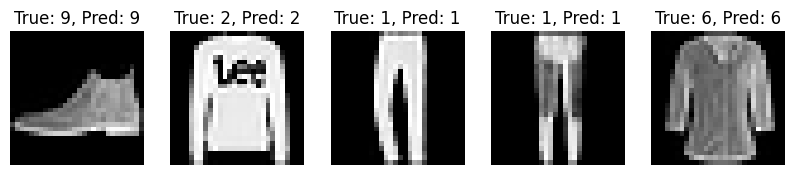

In [71]:
images,labels = next(iter(test_loader))
images = images.reshape(-1,28*28).to(device)
outputs = model(images)
_,pred = torch.max(outputs,1)
fig,ax = plt.subplots(1,5,figsize=(10,5))
for i in range(5):
    ax[i].imshow(images[i].reshape(28,28).cpu(),cmap='gray')
    ax[i].set_title(f'True: {labels[i].item()}, Pred: {pred[i].item()}')
    ax[i].axis('off')
plt.show()

<h2>7. Save the model</h2>

In [73]:
torch.save(model.state_dict(),'./Classification_with_Neural_Network.pth')